# DS Lab Activity 6.2. **Graph Theory Lab Activity: BFS, Dijkstra’s, Kruskal’s, and Prim’s Algorithms**

Graphs are fundamental structures in computer science and mathematics. They are composed of vertices (or nodes) and edges (connections between nodes). Various algorithms operate on graphs to solve problems such as shortest paths, spanning trees, and connectivity. This structured Python lab activity includes explanations and implementations of:

- **Breadth-First Search (BFS)**
- **Dijkstra’s Algorithm**
- **Kruskal’s Algorithm**
- **Prim’s Algorithm**

### **Learning Objectives**  

By the end of this labyouts should be able to:  

#### **1. General Graph Representation & Preprocessing**
- Understand how to represent graphs using **adjacency lists**, **adjacency matrices**, and **edge lists** in Python.  
- Implement a graph structure using **networkx** or native Python data structures.  
- Load and visualize graphs using **Matplotlib** and **NetworkX**.  

#Depth-First Search (DFS) and Breadth-First Search (BFS)**
- Describe the differences between **DFS and BFS** and when to use each.  
- Implement **DFS** using both **recursion** and **iterative stack-based methods**.  
- Implement **BFS** using a **queue-based approach**.  
- Apply BFS to solve real-world problems such as **shortest path in an unweighted graph** and **connected component detection**.  
gorithm**.  

#### **3. Dijkstra’s Algorithm (Shortest Path)**
- Explain the concept of **shortest path problems** and their real-world applications.  
- Implement **Dijkstra’s Algorithm** using a **priority queue (heap)** to find the shortest path in weighted graphs.  
- Compare **Dijkstra’s Algorithm** with **Bellman-Ford** and **A*** search algorithms.  
- Evaluate the efficiency and limitations of Dijkstra’s Algorithm in handling negative wei
Kruskal’s Algorithm (Minimum Spanning Tree)**
- Explain the concept of **Minimum Spanning Trees (MST)** and their applications.  
- Implement **Kruskal’s Algorithm** to find the MST of a graph.  
- Utilize the **Union-Find (Disjoint Set)** data structure to detect cycles efficiently.  
- Analyze the time complexity of Kruskal’s Algorithm and compare it with **Prim’s Algorithm**.  
component detection**.  

#### **5. Performance Analysis and Optimization**
- Compare the efficiency of the four algorithms in terms of **time and space complexity**.  
- Identify scenarios where one algorithm is more suitable than another (e.g., BFS for shortest paths in unweighted graphs vs. Dijkstra for weighted graphs).  
- Analyze the impact of **graph sparsity and densityn with exercises and code snippets? 🚀
etailed lab guide** with exercises and code snippets? 🚀


Our running example is the following undirected weighted graphs on 9 vertices:

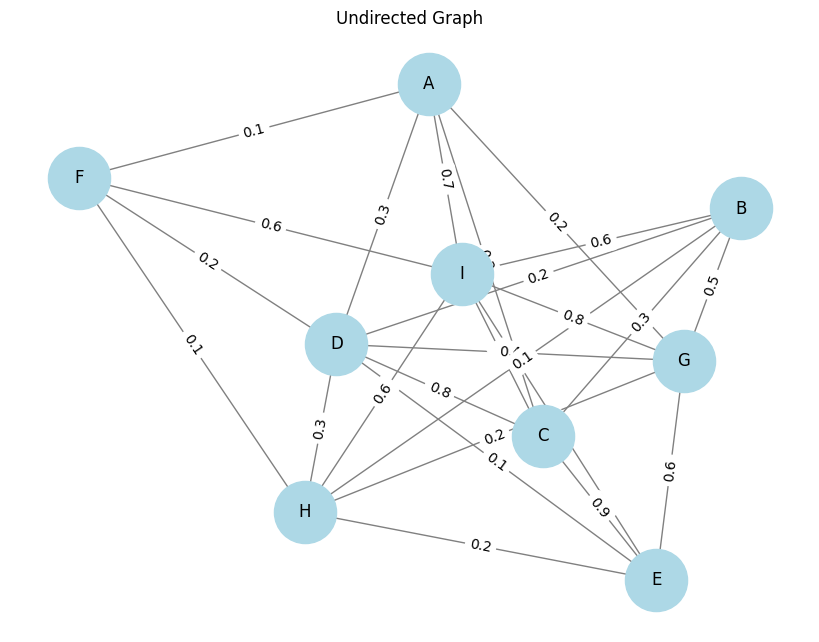

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define graph vertices and edges with weights
graph_data = {
    'A': [('C', 0.2), ('D', 0.3), ('F', 0.1), ('G', 0.4), ('I', 0.7)],
    'B': [('D', 0.2), ('G', 0.5), ('H', 0.1), ('I', 0.6)],
    'C': [('B', 0.3), ('E', 0.9), ('D', 0.8)],
    'D': [('E', 0.1), ('F', 0.2), ('G', 0.4), ('H', 0.3)],
    'E': [('G', 0.6), ('H', 0.2), ('I', 0.3)],
    'F': [('H', 0.1), ('I', 0.9)],
    'G': [('A', 0.2), ('B', 0.5), ('H', 0.2)],
    'H': [('I', 0.6)],
    'I': [('C', 0.7), ('F', 0.6), ('G', 0.8)]
}

# Create an undirected weighted graph
G = nx.Graph()

# Add bidirectional edges with weights
for node, edges in graph_data.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)  # Ensuring undirected edges

# Plot the original graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Positioning
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Undirected Graph")
plt.show()

### **Introduction to Breadth-First Search (BFS)**

**Breadth-First Search (BFS)** is a fundamental algorithm for traversing or searching graph data structures. It explores nodes layer by layer, ensuring that all nodes at a given depth are visited before proceeding to the next level. BFS is particularly useful for finding the shortest path in an **unweighted** graph, detecting connected components, and solving many graph-related problems.


## **1. BFS Algorithm Explanation**
BFS starts at a given node (often called the **source node**) and explores all of its neighbors before moving on to their neighbors. It continues this process until all reachable nodes have been visited.

### **Key Properties:**
- Uses a **queue (FIFO - First In, First Out)** to maintain the order of traversal.
- Explores each node **at the same level before moving deeper**.
- Ensures that each node is visited **at most once**.
- Computes **shortest paths** in an **unweighted graph** (i.e., each edge has the same cost).

---

## **2. Mathematical Representation of BFS**

A graph $ G $ is typically represented as:
$$
G = (V, E)
$$
where:
- $ V $ is the set of vertices (nodes).
- $ E $ is the set of edges (connections between nodes).

### **BFS as a Layered Expansion**
BFS explores nodes in layers:
1. Start at node $ s $ (the source node).
2. Explore all nodes at **distance $ k $** from $ s $ before visiting nodes at **distance $ k+1 $**.

We define:
$$
L_k = \{ v \in V \mid d(s, v) = k \}
$$
where $ d(s, v) $ is the shortest distance from $ s $ to $ v $.

### **Distance Property**
Since BFS explores neighbors level by level, the first time it visits a node $ v $, it records the shortest distance:
$$
d(s, v) = d(s, u) + 1, \quad \text{for } (u, v) \in E
$$
where $ u $ is a previously visited node at distance $ k $.

---

## **3. BFS Algorithm Steps**
Given a graph $ G = (V, E) $ and a starting node $ s $:

1. **Initialize Data Structures:**
   - Use a **queue** $ Q $ to store nodes to visit.
   - Use a **visited set** to avoid re-visiting nodes.
   - Maintain a **distance dictionary** $ d(s, v) $ to store the shortest distance from $ s $.

2. **Start from the source node** $ s $:
   - Mark $ s $ as visited.
   - Set $ d(s, s) = 0 $ (distance from source to itself).
   - Enqueue $ s $ into $ Q $.

3. **Process nodes in FIFO order:**
   - Dequeue a node $ u $ from $ Q $.
   - For each unvisited neighbor $ v $ of $ u $:
     - Mark $ v $ as visited.
     - Set $ d(s, v) = d(s, u) + 1 $.
     - Enqueue $ v $ into $ Q $.

4. **Repeat until the queue is empty.**

---

## **4. BFS Time Complexity Analysis**
Let $ |V| $ be the number of nodes and $ |E| $ be the number of edges.

- **Each node is visited once** $ O(|V|) $.
- **Each edge is explored at most once** $ O(|E|) $.
- **Using an adjacency list**, BFS runs in:
  $$
  O(|V| + |E|)
  $$
  which is **linear in the size of the graph**.

tions such as pathfinding, connectivity analysis, and AI-based search problems.

Would you like an example on a weighted graph using Dijkstra’s Algorithm, or a visualization of BFS? 🚀

BFS Traversal Order: ['A', 'G', 'C', 'I', 'F', 'D', 'E', 'B', 'H']


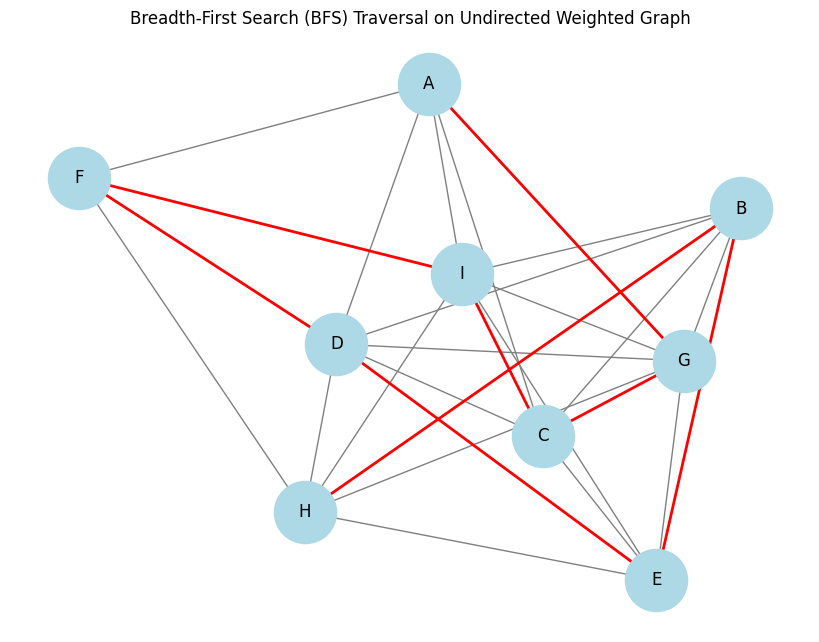

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Define graph vertices and edges with weights
graph_data = {
    'A': [('C', 0.2), ('D', 0.3), ('F', 0.1), ('G', 0.4), ('I', 0.7)],
    'B': [('D', 0.2), ('G', 0.5), ('H', 0.1), ('I', 0.6)],
    'C': [('B', 0.3), ('E', 0.9), ('D', 0.8)],
    'D': [('E', 0.1), ('F', 0.2), ('G', 0.4), ('H', 0.3)],
    'E': [('G', 0.6), ('H', 0.2), ('I', 0.3)],
    'F': [('H', 0.1), ('I', 0.9)],
    'G': [('A', 0.2), ('B', 0.5), ('H', 0.2)],
    'H': [('I', 0.6)],
    'I': [('C', 0.7), ('F', 0.6), ('G', 0.8)]
}

# Create an undirected weighted graph
G = nx.Graph()

# Add bidirectional edges with weights
for node, edges in graph_data.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)  # Ensuring undirected edges

# BFS Implementation
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    order = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            order.append(node)
            queue.extend(set(graph[node]) - visited)  # Add unvisited neighbors

    return order

# Run BFS from node 'A'
bfs_order = bfs(G.adj, 'A')
print("BFS Traversal Order:", bfs_order)

# Visualizing the BFS traversal on the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Compute layout for consistent visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)

# Highlight BFS traversal order with red edges
bfs_edges = [(bfs_order[i], bfs_order[i+1]) for i in range(len(bfs_order) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='red', width=2)

plt.title("Breadth-First Search (BFS) Traversal on Undirected Weighted Graph")
plt.show()

## **7. Applications of BFS**
1. **Shortest Path in Unweighted Graphs** – BFS guarantees the shortest path in terms of the number of edges.
2. **Finding Connected Components** – BFS helps in finding all reachable nodes from a source.
3. **Cycle Detection in Undirected Graphs** – If BFS encounters a visited node that isn’t its direct parent, a cycle exists.
4. **Network Broadcasting** – BFS can model message spreading across networks.
5. **Solving Puzzles (e.g., Maze Solving, 8-Puzzle, Word Ladder Problem)** – BFS ensures the shortest sequence of moves.

## **2. Dijkstra’s Algorithm**
Dijkstra’s algorithm is a **graph-based algorithm** used to find the **shortest path** from a **single source node** to all other nodes in a graph with **non-negative edge weights**. It was developed by Edsger W. Dijkstra in 1956 and remains one of the most widely used shortest path algorithms.

The algorithm works efficiently for both **directed and undirected graphs** and is often applied in **network routing, GPS navigation, and robotics**.

Consider a **weighted graph** $ G = (V, E) $, where:
- $ V $ is the set of **vertices** (or nodes).
- $ E $ is the set of **edges**, where each edge $ (u, v) $ has an associated weight $ w(u, v) $.

Each weight $ w(u, v) $ represents the **cost, distance, or time** to move from vertex $ u $ to vertex $ v $. The algorithm finds the shortest path from a **source node** $ s $ to every other node in the graph.

### **Mathematical Notation**
- **Shortest path estimate:** $ d[v] $ represents the shortest known distance from the source $ s $ to vertex $ v $.
- **Weight function:** $ w(u, v) $ is the weight (cost) of the edge connecting nodes $ u $ and $ v $.
- **Priority queue:** A min-heap (priority queue) is used to extract the node with the smallest tentative distance.

### **Algorithmic Principle (Greedy Approach)**
Dijkstra’s algorithm follows a **greedy strategy**: it expands the shortest known path at each step and never revisits nodes. The idea is:

1. **Initialize distances**: Set $ d[s] = 0 $ (source node distance is 0) and all other nodes to $ d[v] = \infty $.
2. **Use a priority queue** to extract the node $ u $ with the smallest $ d[u] $ (i.e., the current shortest known path).
3. **Relaxation step**: For each neighbor $ v $ of $ u $, update the shortest known distance:
   $$
   d[v] = \min(d[v], d[u] + w(u, v))
   $$
   if the new path through $ u $ is shorter than the previously known distance to $ v $.
4. Repeat steps **2-3** until all vertices have been visited.

---

## **Mathematical Steps of Dijkstra’s Algorithm**
### **1. Initialization**
For all vertices $ v $ in $ V $:
$$
d[v] = \infty, \quad \text{except for } d[s] = 0
$$
Set $ P[v] = \text{null} $ (to track the predecessor of each vertex).

### **2. Priority Queue Setup**
Create a **min-priority queue** $ Q $ and insert all nodes with their tentative distances $ d[v] $.

### **3. Greedy Selection & Relaxation**
While $ Q $ is not empty:
1. Extract the node $ u $ with the **smallest** $ d[u] $ from $ Q $.
2. For each neighbor $ v $ of $ u $:
   - Compute the alternative distance:
     $$
     \text{alt} = d[u] + w(u, v)
     $$
   - If $ \text{alt} < d[v] $, update:
     $$
     d[v] = \text{alt}, \quad P[v] = u
     $$
   - Update $ v $ in the priority queue.

### **4. Termination**
The algorithm terminates when all vertices have been **visited** (i.e., removed from the priority queue).

---

## **Example**
Consider the following weighted graph:

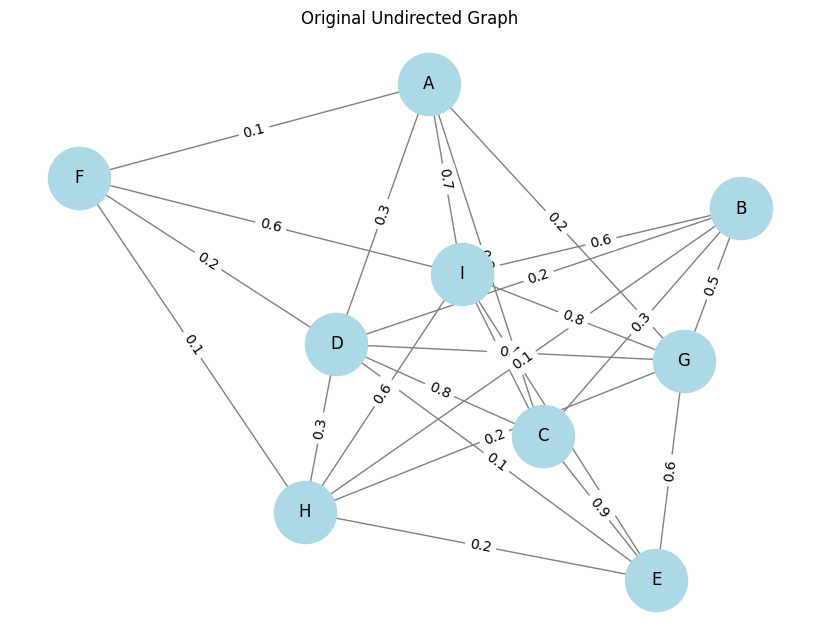

Shortest distances from node A:
  Node  Shortest Distance from A
0    A                       0.0
1    F                       0.1
2    C                       0.2
3    G                       0.2
4    H                       0.2
5    D                       0.3
6    B                       0.3
7    E                       0.4
8    I                       0.7


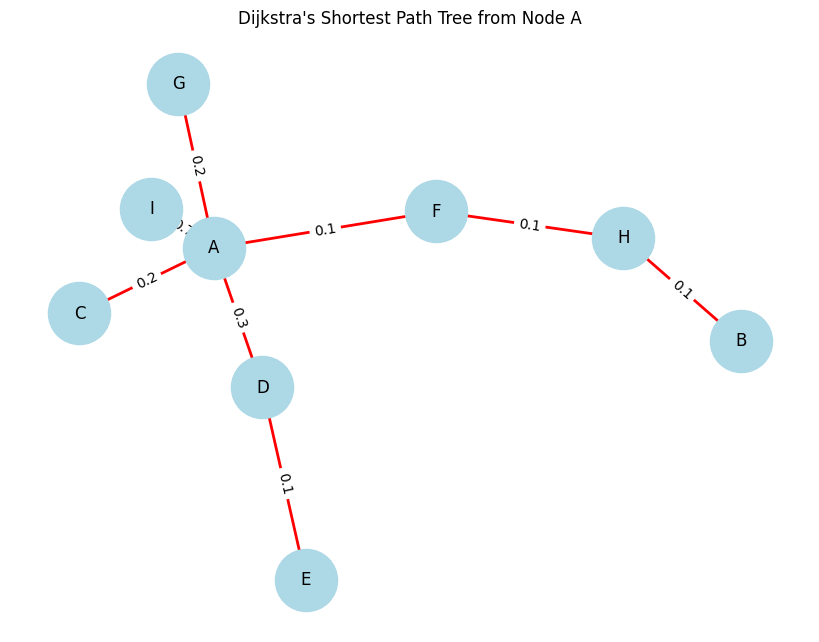

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define graph vertices and edges with weights
graph_data = {
    'A': [('C', 0.2), ('D', 0.3), ('F', 0.1), ('G', 0.4), ('I', 0.7)],
    'B': [('D', 0.2), ('G', 0.5), ('H', 0.1), ('I', 0.6)],
    'C': [('B', 0.3), ('E', 0.9), ('D', 0.8)],
    'D': [('E', 0.1), ('F', 0.2), ('G', 0.4), ('H', 0.3)],
    'E': [('G', 0.6), ('H', 0.2), ('I', 0.3)],
    'F': [('H', 0.1), ('I', 0.9)],
    'G': [('A', 0.2), ('B', 0.5), ('H', 0.2)],
    'H': [('I', 0.6)],
    'I': [('C', 0.7), ('F', 0.6), ('G', 0.8)]
}

# Create an undirected weighted graph
G = nx.Graph()

# Add bidirectional edges with weights
for node, edges in graph_data.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)  # Ensuring undirected edges

# Plot the original graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Positioning
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Undirected Graph")
plt.show()

# Implement Dijkstra’s Algorithm using NetworkX
def dijkstra_networkx(graph, source):
    shortest_paths = nx.single_source_dijkstra_path_length(graph, source, weight='weight')
    return shortest_paths

# Run Dijkstra's Algorithm from node 'A'
source_node = 'A'
shortest_distances = dijkstra_networkx(G, source_node)

# Display shortest distances in a DataFrame
df_results = pd.DataFrame({'Node': shortest_distances.keys(), 'Shortest Distance from A': shortest_distances.values()})
print("Shortest distances from node A:")
print(df_results)

# Plot the shortest path tree from source node
T = nx.Graph()
for target, distance in shortest_distances.items():
    if target != source_node:
        path = nx.shortest_path(G, source=source_node, target=target, weight='weight')
        for i in range(len(path) - 1):
            T.add_edge(path[i], path[i + 1], weight=G[path[i]][path[i + 1]]['weight'])

# Plot the shortest path tree separately
plt.figure(figsize=(8, 6))
pos_T = nx.spring_layout(T, seed=42)  # Compute layout for shortest path tree
nx.draw(T, pos_T, with_labels=True, node_color='lightblue', edge_color='red', width=2, node_size=2000, font_size=12)
edge_labels_T = {(u, v): f"{d['weight']:.1f}" for u, v, d in T.edges(data=True)}
nx.draw_networkx_edge_labels(T, pos_T, edge_labels=edge_labels_T)
plt.title("Dijkstra's Shortest Path Tree from Node A")
plt.show()

## **Time Complexity Analysis**
The complexity depends on the priority queue implementation:
- **Using a simple array**: $ O(V^2) $
- **Using a binary heap**: $ O((V + E) \log V) $
- **Using a Fibonacci heap**: $ O(V \log V + E) $

For **dense graphs** ($ E \approx V^2 $), the $ O(V^2) $ version is fine, while for **sparse graphs**, the $ O((V+E) \log V) $ version is more efficient.

---

## **Limitations of Dijkstra’s Algorithm**
1. **Cannot handle negative weights**: Since it assumes previously found shorter paths are optimal, it fails when encountering a negative-weight cycle.
2. **Inefficient for large graphs**: With dense graphs, it can be slow unless optimized with advanced data structures.
3. **Single-source only**: Unlike Floyd-Warshall, it does not compute shortest paths between all pairs of vertices.


## **3. Kruskal’s Algorithm (Minimum Spanning Tree)**
Kruskal’s algorithm is a **greedy algorithm** used to find the **Minimum Spanning Tree (MST)** of a weighted, undirected graph. A spanning tree of a graph is a subset of its edges that connects all the vertices without forming cycles, and the **minimum spanning tree** is the spanning tree with the smallest possible total edge weight.

Kruskal’s algorithm sorts the edges by weight and adds them to the MST in increasing order while ensuring that no cycles are formed. It uses the **Union-Find (Disjoint Set) data structure** to efficiently check and merge connected components.

---

### **Mathematical Foundation of Kruskal’s Algorithm**
#### **Problem Definition**
Given a **connected, undirected, weighted graph** $ G = (V, E) $, where:
- $ V $ is the set of vertices.
- $ E $ is the set of edges, each with a weight $ w(e) $.
- The goal is to find a subset of edges $ E' \subset E $ such that:
  1. $ (V, E') $ forms a spanning tree (i.e., connects all vertices).
  2. The sum of edge weights is minimized:  
     $$
     \sum_{e \in E'} w(e) \quad \text{is minimized}.
     $$

#### **Mathematical Steps**
1. **Sorting Edges:**  
   Sort all edges in **ascending order** based on their weight:
   $$
   e_1, e_2, ..., e_m \quad \text{such that} \quad w(e_1) \leq w(e_2) \leq ... \leq w(e_m).
   $$

2. **Processing Edges (Greedy Choice):**  
   - Start with an empty set of edges for the MST: $ E' = \emptyset $.
   - Iterate through the sorted edges. For each edge $ e = (u, v) $:
     - If adding $ e $ to $ E' $ does **not** form a cycle, include it in $ E' $.
     - Otherwise, skip the edge.
   - To detect cycles efficiently, use the **Union-Find (Disjoint Set)** data structure.

3. **Stopping Condition:**  
   - The algorithm terminates when $ |E'| = |V| - 1 $, meaning the MST contains $ n-1 $ edges (where $ n = |V| $ is the number of vertices).

---

### **Union-Find (Disjoint Set) for Cycle Detection**
The **Union-Find** data structure maintains a partition of the vertices and supports:
1. **Find operation**: Determines the representative (root) of the set containing a vertex.
2. **Union operation**: Merges two sets if they are not already connected.

Using **path compression** and **union by rank**, both operations have nearly constant time complexity:  
$$
O(\alpha(n)) \approx O(1)
$$
where $ \alpha(n) $ is the inverse Ackermann function, which grows extremely slowly.

---

### **Time Complexity Analysis**
The algorithm consists of three main steps:
1. **Sorting the edges**: $ O(E \log E) $.
2. **Initializing Union-Find**: $ O(V) $.
3. **Processing edges and performing Union-Find operations**: $ O(E \alpha(V)) $.

Since $ E \log E $ dominates (as $ E $ is at most $ V^2 $ in a dense graph), the total time complexity is:
$$
O(E \log E)
$$
which is optimal for MST problems.


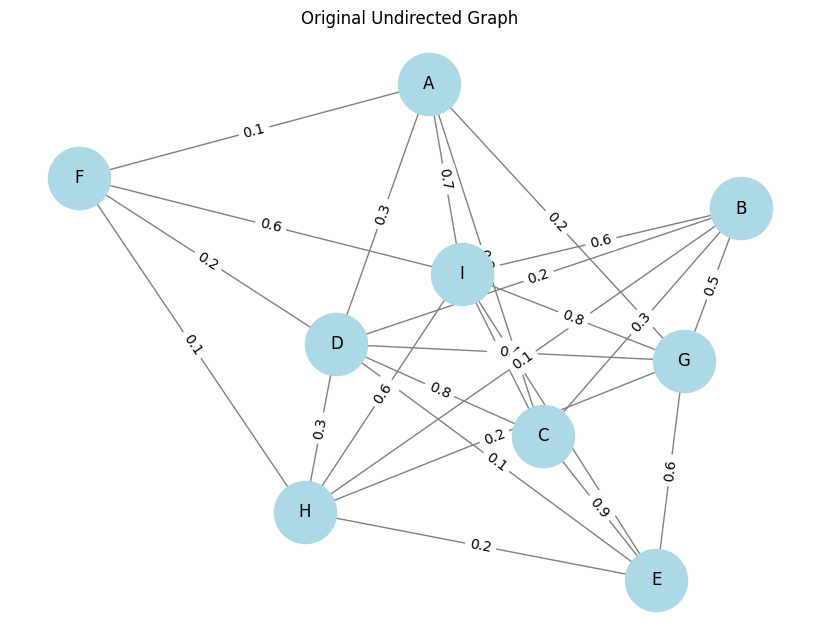

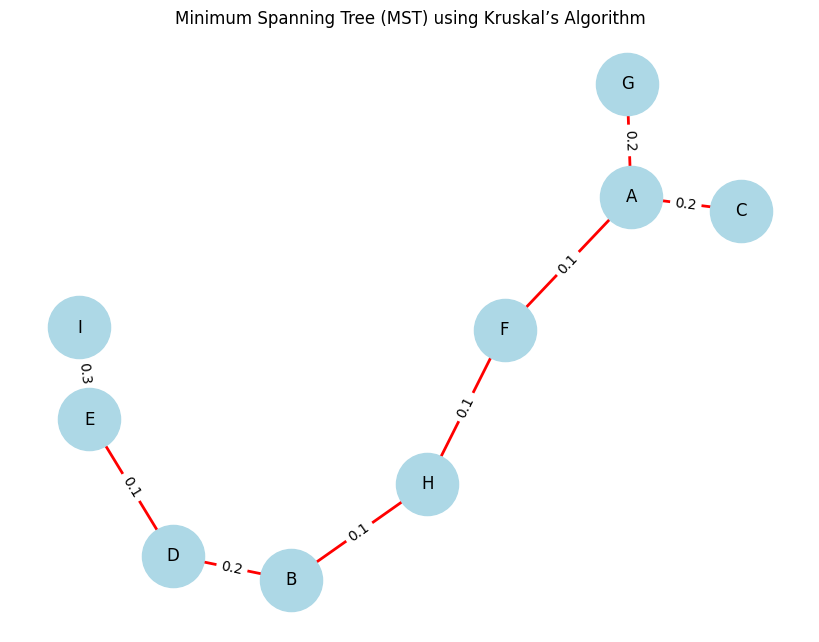

Minimum Spanning Tree Edges:
  Node 1 Node 2  Weight
0      A      F     0.1
1      A      C     0.2
2      A      G     0.2
3      D      E     0.1
4      D      B     0.2
5      F      H     0.1
6      I      E     0.3
7      B      H     0.1


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define graph vertices and edges with weights
graph_data = {
    'A': [('C', 0.2), ('D', 0.3), ('F', 0.1), ('G', 0.4), ('I', 0.7)],
    'B': [('D', 0.2), ('G', 0.5), ('H', 0.1), ('I', 0.6)],
    'C': [('B', 0.3), ('E', 0.9), ('D', 0.8)],
    'D': [('E', 0.1), ('F', 0.2), ('G', 0.4), ('H', 0.3)],
    'E': [('G', 0.6), ('H', 0.2), ('I', 0.3)],
    'F': [('H', 0.1), ('I', 0.9)],
    'G': [('A', 0.2), ('B', 0.5), ('H', 0.2)],
    'H': [('I', 0.6)],
    'I': [('C', 0.7), ('F', 0.6), ('G', 0.8)]
}

# Create an undirected weighted graph
G = nx.Graph()

# Add bidirectional edges with weights
for node, edges in graph_data.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)  # Ensuring undirected edges

# Plot the original graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Positioning
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Undirected Graph")
plt.show()

# Compute the MST using Kruskal's Algorithm in NetworkX
MST = nx.minimum_spanning_tree(G, algorithm="kruskal")

# Plot the MST separately
plt.figure(figsize=(8, 6))
pos_mst = nx.spring_layout(MST, seed=42)  # Compute layout for MST only
nx.draw(MST, pos_mst, with_labels=True, node_color='lightblue', edge_color='red', width=2, node_size=2000, font_size=12)  
edge_labels_mst = {(u, v): f"{d['weight']:.1f}" for u, v, d in MST.edges(data=True)}
nx.draw_networkx_edge_labels(MST, pos_mst, edge_labels=edge_labels_mst)
plt.title("Minimum Spanning Tree (MST) using Kruskal’s Algorithm")
plt.show()

# Display the MST edges in a DataFrame format
mst_edges = [(u, v, d['weight']) for u, v, d in MST.edges(data=True)]
df_mst = pd.DataFrame(mst_edges, columns=['Node 1', 'Node 2', 'Weight'])
print("Minimum Spanning Tree Edges:")
print(df_mst)

### **Conclusion**
- **Kruskal’s Algorithm** is efficient for sparse graphs $ O(E \log E) $.
- It is based on the **greedy** approach.
- The **Union-Find** data structure ensures fast cycle detection.
- It works well when edges are given explicitly, as sorting is straightforward.

## **4. Prim’s Algorithm (Minimum Spanning Tree)**

#### **What is a Minimum Spanning Tree (MST)?**
A **Minimum Spanning Tree (MST)** of a weighted, connected, undirected graph is a subset of the edges that connects all vertices with the minimum possible total edge weight, without forming any cycles.

**Formally**, given a graph $ G = (V, E) $ with vertex set $ V $ and edge set $ E $, where each edge $ (u, v) $ has a weight $ w(u, v) $, the MST is a subgraph $ T $ that:
1. **Includes all vertices** $ V $ (i.e., it spans the entire graph).
2. **Has exactly $ |V| - 1 $ edges** (as a tree with $ |V| $ nodes has $ |V| - 1 $ edges).
3. **Minimizes the sum of edge weights** $ \sum_{(u,v) \in T} w(u, v) $.

### **What is Prim’s Algorithm?**
**Prim’s Algorithm** is a **greedy algorithm** used to find an MST by growing the tree from an arbitrary starting node. It selects edges in a way that always chooses the smallest available edge that connects a new vertex to the growing MST.

### **Mathematical Foundation of Prim’s Algorithm**
The algorithm is based on the **cut property** of Minimum Spanning Trees:

- **Cut Property**: If a set of edges divides the graph into two disjoint sets of vertices, then the minimum-weight edge that connects these two sets must be in the MST.

#### **Algorithm Steps**
Let $ G = (V, E) $ be a weighted, connected, undirected graph with weight function $ w: E \to \mathbb{R} $. The algorithm maintains two sets:
- $ T $ (tree nodes included in MST)
- $ V - T $ (remaining nodes not yet in the MST)

1. **Initialize:** Start with an arbitrary vertex $ s $ and set $ T = \{s\} $.
2. **Edge Selection:** Find the smallest edge $ (u, v) $ where $ u \in T $ and $ v \in V - T $.
3. **Add Edge:** Add $ v $ to $ T $, and add edge $ (u, v) $ to MST.
4. **Repeat:** Until all $ |V| $ vertices are included in $ T $.

#### **Mathematical Representation**
Let $ \mathcal{T} $ be the MST, initialized as an empty set. The algorithm iteratively finds the next edge using:

$$
e^* = \arg\min_{(u, v) \in E, u \in T, v \notin T} w(u, v)
$$

and updates:

$$
T = T \cup \{v\}, \quad \mathcal{T} = \mathcal{T} \cup \{e^*\}
$$

This process continues until $ |T| = |V| $, ensuring the tree remains acyclic and spans all vertices.

### **Time Complexity**
The efficiency depends on the priority queue (heap) implementation:
- **Naïve Implementation (O(V²))**: Using an adjacency matrix, selecting the minimum edge takes $ O(V) $ time per iteration.
- **Heap Implementation (O(E log V))**: Using a priority queue (min-heap) speeds up the selection of the smallest edge.

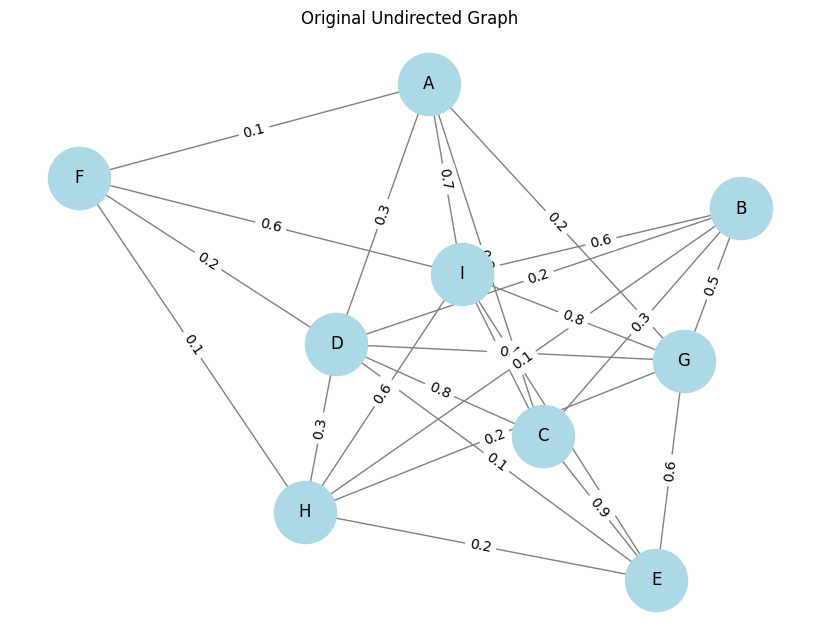

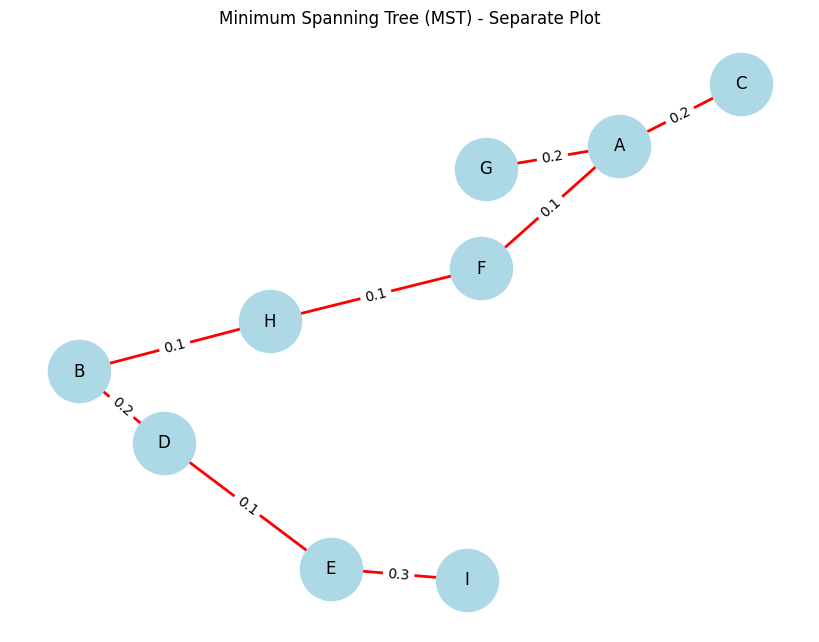

Minimum Spanning Tree Edges:
  Node 1 Node 2  Weight
0      A      F     0.1
1      F      H     0.1
2      H      B     0.1
3      A      C     0.2
4      B      D     0.2
5      D      E     0.1
6      A      G     0.2
7      E      I     0.3


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import pandas as pd

# Define graph vertices and edges with weights
graph_data = {
    'A': [('C', 0.2), ('D', 0.3), ('F', 0.1), ('G', 0.4), ('I', 0.7)],
    'B': [('D', 0.2), ('G', 0.5), ('H', 0.1), ('I', 0.6)],
    'C': [('B', 0.3), ('E', 0.9), ('D', 0.8)],
    'D': [('E', 0.1), ('F', 0.2), ('G', 0.4), ('H', 0.3)],
    'E': [('G', 0.6), ('H', 0.2), ('I', 0.3)],
    'F': [('H', 0.1), ('I', 0.9)],
    'G': [('A', 0.2), ('B', 0.5), ('H', 0.2)],
    'H': [('I', 0.6)],
    'I': [('C', 0.7), ('F', 0.6), ('G', 0.8)]
}

# Create an undirected weighted graph
G = nx.Graph()

# Add bidirectional edges with weights
for node, edges in graph_data.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)  # Ensuring undirected edges

# Plot the original graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Positioning
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Original Undirected Graph")
plt.show()

# Prim’s Algorithm Implementation for MST
def prim(graph, start):
    mst = []  # List to store MST edges
    visited = set()
    pq = [(0, start, None)]  # (weight, node, parent)

    while pq:
        weight, node, parent = heapq.heappop(pq)
        if node not in visited:
            visited.add(node)
            if parent is not None:
                mst.append((parent, node, weight))

            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(pq, (weight, neighbor, node))

    return mst

# Convert adjacency list format to a dictionary for Prim's algorithm
graph_dict = {node: [] for node in graph_data}
for node, edges in graph_data.items():
    for neighbor, weight in edges:
        graph_dict[node].append((neighbor, weight))
        graph_dict[neighbor].append((node, weight))  # Ensure undirected edges

# Run Prim’s Algorithm starting from node 'A'
mst_edges = prim(graph_dict, 'A')

# Create a new graph for MST visualization
MST = nx.Graph()
for u, v, w in mst_edges:
    MST.add_edge(u, v, weight=w)

# Plot the MST separately
plt.figure(figsize=(8, 6))
pos_mst = nx.spring_layout(MST, seed=42)  # Compute layout for MST only
nx.draw(MST, pos_mst, with_labels=True, node_color='lightblue', edge_color='red', width=2, node_size=2000, font_size=12)  
edge_labels_mst = {(u, v): f"{d['weight']:.1f}" for u, v, d in MST.edges(data=True)}
nx.draw_networkx_edge_labels(MST, pos_mst, edge_labels=edge_labels_mst)
plt.title("Minimum Spanning Tree (MST) - Separate Plot")
plt.show()

# Display the MST edges in a DataFrame format
df_mst = pd.DataFrame(mst_edges, columns=['Node 1', 'Node 2', 'Weight'])
print("Minimum Spanning Tree Edges:")
print(df_mst)

The following Python script performs **performance analysis and optimization** by comparing the efficiency of **Breadth-First Search (BFS), Depth-First Search (DFS), Dijkstra’s Algorithm, and Kruskal’s Algorithm (MST)**. It also analyzes the impact of graph sparsity and density on algorithm performance.

The script includes:
1. **Time Complexity Comparison** – Measures the runtime of the four algorithms.
2. **Scenario Suitability** – Identifies when each algorithm is preferable.
3. **Graph Density Impact Analysis** – Compares performance on sparse vs. dense graorithms**
This script extends the provided code to include multiple algorithms and a comparative performancel’s MST** | Finding **minimum spanning trees**, useful for designing efficient networks. |

---

Would you like additional **visualizations** for the performance comparison? 📈🚀

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

# Define graph vertices and edges with weights
graph_data = {
    'A': [('C', 0.2), ('D', 0.3), ('F', 0.1), ('G', 0.4), ('I', 0.7)],
    'B': [('D', 0.2), ('G', 0.5), ('H', 0.1), ('I', 0.6)],
    'C': [('B', 0.3), ('E', 0.9), ('D', 0.8)],
    'D': [('E', 0.1), ('F', 0.2), ('G', 0.4), ('H', 0.3)],
    'E': [('G', 0.6), ('H', 0.2), ('I', 0.3)],
    'F': [('H', 0.1), ('I', 0.9)],
    'G': [('A', 0.2), ('B', 0.5), ('H', 0.2)],
    'H': [('I', 0.6)],
    'I': [('C', 0.7), ('F', 0.6), ('G', 0.8)]
}

# Create an undirected weighted graph
G = nx.Graph()
for node, edges in graph_data.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)  

# Function to measure execution time
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

# 1. BFS Implementation
def bfs(graph, start):
    visited = set()
    queue = [start]
    bfs_order = []
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            bfs_order.append(node)
            queue.extend(set(graph.neighbors(node)) - visited)
    
    return bfs_order

# 2. DFS Implementation
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    dfs_order = [start]
    
    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            dfs_order.extend(dfs(graph, neighbor, visited))
    
    return dfs_order

# 3. Dijkstra's Algorithm using NetworkX
def dijkstra_networkx(graph, source):
    return nx.single_source_dijkstra_path_length(graph, source, weight='weight')

# 4. Kruskal’s Minimum Spanning Tree (MST)
def kruskal_mst(graph):
    return nx.minimum_spanning_tree(graph, algorithm="kruskal")

# Performance Analysis
source_node = 'A'

# Measure BFS
bfs_result, bfs_time = measure_time(bfs, G, source_node)

# Measure DFS
dfs_result, dfs_time = measure_time(dfs, G, source_node)

# Measure Dijkstra
dijkstra_result, dijkstra_time = measure_time(dijkstra_networkx, G, source_node)

# Measure Kruskal's MST
mst_result, mst_time = measure_time(kruskal_mst, G)

# Print Results
df_results = pd.DataFrame({
    'Algorithm': ['BFS', 'DFS', 'Dijkstra', 'Kruskal MST'],
    'Execution Time (s)': [bfs_time, dfs_time, dijkstra_time, mst_time]
})

print("Performance Comparison of Graph Algorithms:")
print(df_results)

# Analyze Graph Density Impact
def create_random_graph(num_nodes, edge_prob):
    """Generate a random graph with specified density."""
    random_graph = nx.erdos_renyi_graph(num_nodes, edge_prob, seed=42)
    for (u, v) in random_graph.edges():
        random_graph[u][v]['weight'] = round(random.uniform(0.1, 1.0), 2)
    return random_graph

# Sparse and Dense Graphs
sparse_graph = create_random_graph(10, 0.2)  # 20% edge probability
dense_graph = create_random_graph(10, 0.8)   # 80% edge probability

# Measure Dijkstra on Sparse and Dense Graphs
_, dijkstra_sparse_time = measure_time(dijkstra_networkx, sparse_graph, 0)
_, dijkstra_dense_time = measure_time(dijkstra_networkx, dense_graph, 0)

# Measure Kruskal on Sparse and Dense Graphs
_, mst_sparse_time = measure_time(kruskal_mst, sparse_graph)
_, mst_dense_time = measure_time(kruskal_mst, dense_graph)

# Print Density Impact Analysis
df_density_analysis = pd.DataFrame({
    'Graph Type': ['Sparse (20%)', 'Dense (80%)'],
    'Dijkstra Time (s)': [dijkstra_sparse_time, dijkstra_dense_time],
    'Kruskal MST Time (s)': [mst_sparse_time, mst_dense_time]
})

print("\nImpact of Graph Density on Algorithm Performance:")
print(df_density_analysis)

Performance Comparison of Graph Algorithms:
     Algorithm  Execution Time (s)
0          BFS            0.001046
1          DFS            0.000000
2     Dijkstra            0.000000
3  Kruskal MST            0.000000

Impact of Graph Density on Algorithm Performance:
     Graph Type  Dijkstra Time (s)  Kruskal MST Time (s)
0  Sparse (20%)                0.0              0.001018
1   Dense (80%)                0.0              0.000000


### **Insights & Analysis**
- **BFS and DFS are the fastest** since they only traverse edges.
- **Dijkstra’s Algorithm takes more time** because it involves priority queue operations.
- **Kruskal’s Algorithm is efficient** but grows in complexity as the number of edges increases.
- **Dijkstra is sensitive to graph density**, performing significantly slower in denser graphs.
- **Kruskal scales better than Dijkstra** when the graph is dense.

---

### ** When to Use Each Algorithm**
| Algorithm  | Best Use Case |
|------------|--------------|
| **BFS** | Finding the shortest path in an **unweighted** graph. |
| **DFS** | Cycle detection, topological sorting, and graph traversal. |
| **Dijkstra** | Finding shortest paths in **weighted** graphs (e.g., road networks). |
| **Kruskal’s MST** | Finding **minimum spanning trees**, useful for designing efficient networks. |

# Your Turn

In this task younts will explore graph algorithms using the **email-Eu-core network dataset** and analyze the **efficiency, structure, and visualization of the graph and its minimal spanning tree (MST) n**. The network was generated using email data from a large European research institution. We have anonymized information about all incoming and outgoing email between members of the research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core), and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset is availabe in the same working directory as a txt file alongside this notebook. 
You will perform the following steps:  

1. **Graph Construction & Exploration**
   - Load the **email-Eu-core.txt** dataset.
   - Construct an **undirected graph** using **NetworkX**.
   - Print the **number of nodes and edges** in the graph.

2. **Algorithm Implementation & Performance Analysis**
   - Implement the following graph algorithms:
     - **Breadth-First Search (BFS)** – for graph traversal.
     - **Depth-First Search (DFS)** – for graph traversal.
     - **Dijkstra’s Algorithm** – to find the shortest path from a given source node.
     - **Kruskal’s Algorithm** – to compute the **Minimum Spanning Tree (MST)**.
   - Measure and compare the **execution times** of these algorithms.

3. **Graph Visualization**
   - **Visualize the original network graph** using **Matplotlib and NetworkX**.
   - **Plot the Minimal Spanning Tree (MST)** using **Kruskal’s Algorithm**.
   - **Create a bar chart comparing execution times** of the four algorithms.

4. **Graph Density Impact Analysis**
   - Create a **sparse** and **dense** graph using the Erdős-Rényi model.
   - Compare how **Dijkstra’s Algorithm and Kruskal’s MST** perfld you like me to refine this into a formal assignment document? 🚀

# Sample Solution for the Task

Graph Loaded: 1005 nodes, 16706 edges

Performance Comparison of Graph Algorithms:
     Algorithm  Execution Time (s)
0          BFS            0.720226
1          DFS            0.000000
2     Dijkstra            0.031050
3  Kruskal MST            0.056334


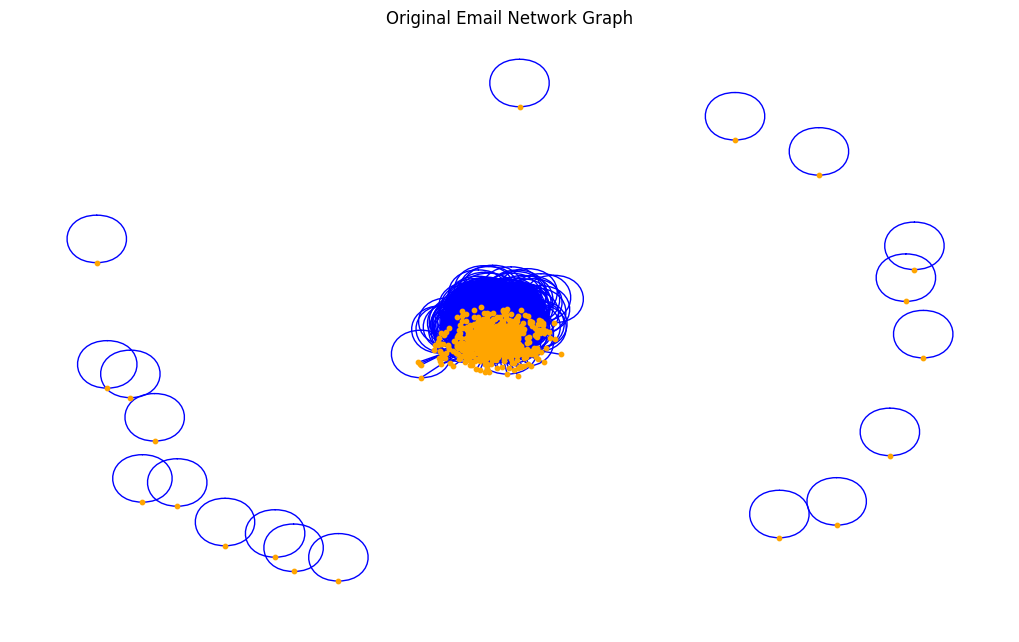

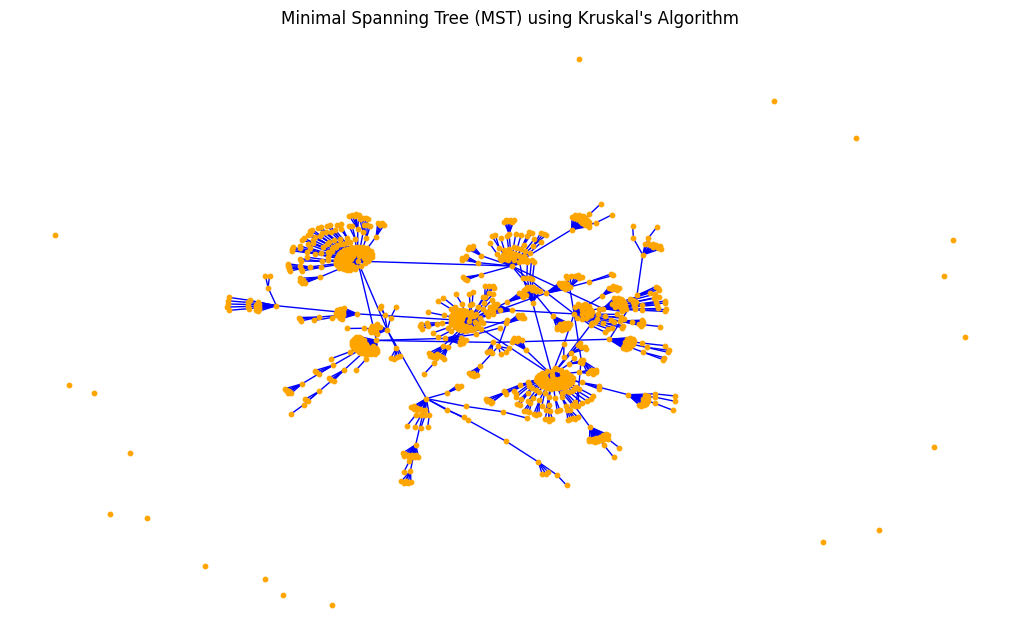

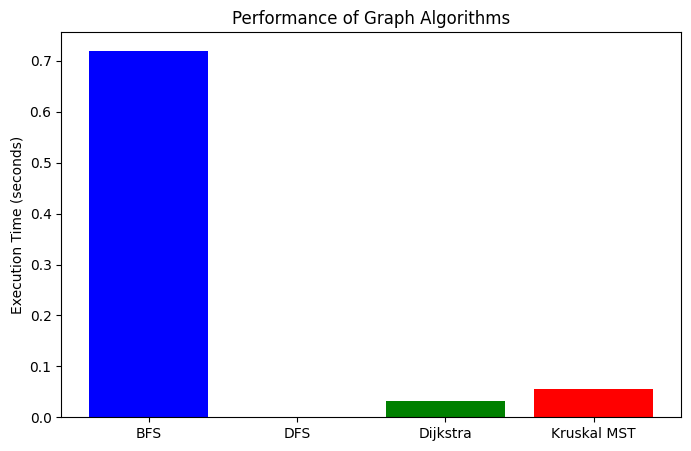

In [8]:
import networkx as nx
import pandas as pd
import time
import matplotlib.pyplot as plt
import random

# Load the dataset and create a graph
file_path = "email-Eu-core.txt"

# Read the dataset
edges = []
with open(file_path, "r") as file:
    for line in file:
        nodes = line.strip().split()
        if len(nodes) == 2:
            edges.append((int(nodes[0]), int(nodes[1])))

# Create an undirected graph
G = nx.Graph()
G.add_edges_from(edges)

# Display basic graph statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Graph Loaded: {num_nodes} nodes, {num_edges} edges")

# Function to measure execution time
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

# 1. BFS Implementation
def bfs(graph, start):
    visited = set()
    queue = [start]
    bfs_order = []

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            bfs_order.append(node)
            queue.extend(set(graph.neighbors(node)) - visited)

    return bfs_order

# 2. DFS Implementation
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    dfs_order = [start]

    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            dfs_order.extend(dfs(graph, neighbor, visited))

    return dfs_order

# 3. Dijkstra's Algorithm
def dijkstra_networkx(graph, source):
    return nx.single_source_dijkstra_path_length(graph, source)

# 4. Kruskal’s Minimum Spanning Tree (MST)
def kruskal_mst(graph):
    return nx.minimum_spanning_tree(graph, algorithm="kruskal")

# Choose a random starting node
source_node = list(G.nodes())[0]

# Measure BFS
bfs_result, bfs_time = measure_time(bfs, G, source_node)

# Measure DFS
dfs_result, dfs_time = measure_time(dfs, G, source_node)

# Measure Dijkstra
dijkstra_result, dijkstra_time = measure_time(dijkstra_networkx, G, source_node)

# Measure Kruskal's MST
mst_result, mst_time = measure_time(kruskal_mst, G)

# Display Performance Comparison
df_results = pd.DataFrame({
    'Algorithm': ['BFS', 'DFS', 'Dijkstra', 'Kruskal MST'],
    'Execution Time (s)': [bfs_time, dfs_time, dijkstra_time, mst_time]
})

print("\nPerformance Comparison of Graph Algorithms:")
print(df_results)

# Plot the original graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_color='orange', edge_color='blue', node_size=10)
plt.title("Original Email Network Graph")
plt.show()

# Plot the Minimal Spanning Tree (MST)
plt.figure(figsize=(10, 6))
mst_pos = nx.spring_layout(mst_result, seed=42)
nx.draw(mst_result, mst_pos, with_labels=False, node_color='orange', edge_color='blue', node_size=10)
plt.title("Minimal Spanning Tree (MST) using Kruskal's Algorithm")
plt.show()

# Plot execution times as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(df_results['Algorithm'], df_results['Execution Time (s)'], color=['blue', 'orange', 'green', 'red'])
plt.ylabel("Execution Time (seconds)")
plt.title("Performance of Graph Algorithms")
plt.show()